# An Introduction to pyGeochemCalc

`Adedapo Awolayo` and `Benjamin Tutolo` 2022-01-31

## Overview  <a class="anchor" id="section_1"></a>
The pyGeochemCalc (pygcc) tool, a package for the python software environment, serves as an upgrade over the `DBCreate` and `SUPCRT92` software package. `DBCreate` has been developed based on `SUPCRT92` as a tool for creating thermodynamic database for geochemical calulations in tools like GWB, EQ36 and ToughReact (Kong et al., 2013). This community-driven, open-source Python package incorporates existing and newly implemented functions for calculating the thermodynamic properties of gas, aqueous, and mineral (including solid solutions - plagioclase, alkali-feldspar, olivine, pyroxene and clinopyroxene, and variable-formula clays) species, as well as reactions amongst these species, over a broad range of temperature and pressure conditions using the *`International Association for the Properties of Water and Steam`* (IAWPS) Formulation 1995 (Wagner and Pruß, 2002) equation of state and *`Zhang & Duan model Formulation`* (Zhang and Duan, 2005 and 2009) for Deep Earth Water (DEW) conditions. In addition, pygcc incorporates functions that permit the seamless integration and usage of these newly produced thermodynamic data in popular geochemical software including the Geochemist’s Workbench, EQ3/6, TOUGHREACT, and PFLOTRAN. The package is swift for ordinary stand-alone calculations and could be modified to support direct incorporation into other software, such as reactive-transport codes. The package is open-source and intended to be community-driven, such that the package and its capabilities can evolve in tandem with the needs of the geochemical modeling community

### Installing and loading pyGeochemCalc  <a class="anchor" id="section_1_1"></a>
After starting python, install pygcc through running `pip install pygcc` in either your shell or anaconda prompt. Then, do either of the following as applicable:

* create a python file (either .py or ipynb) and write the following command:

In [1]:
from pygcc.pygcc_utils import *

&emsp; Save and Run the script with Spyder/Jupyter or in your shell/powershell/Anaconda prompt (if script is .py) using:

> python scriptname.py
  
* run python in your shell/powershell/Anaconda prompt by calling `python` and then run the following command:

In [2]:
from pygcc.pygcc_utils import *

### Getting help  <a class="anchor" id="section_1_2"></a>
After installation, type and run the following commands on Spyder terminal or Jupyter or shell/powershell/Anaconda prompt to browse the main function names in the pyGeochemCalc:

In [3]:
import pygcc.pygcc_utils as pyGCC
print(main_function_name(pyGCC))

['Helgeson_activity', 'Henry_duan_sun', 'OrderedDict', 'ZhangDuan', 'aw_correlation', 'calcRxnlogK', 'calc_elem_count_molewt', 'calclogKclays', 'co2fugacity', 'convert_temperature', 'db_reader', 'derivative', 'drummondgamma', 'gamma_correlation', 'heatcap', 'iapws95', 'importconfile', 'info', 'outputfmt', 'readIAPWS95data', 'roundup_hundredth', 'roundup_tenth', 'solidsolution_thermo', 'supcrtaq', 'water_dielec', 'write_database']


Type `help(function name)` on the commands to see an overview documentation for each function; many of which include examples. For example:

In [4]:
help(Helgeson_activity)

Help on function Helgeson_activity in module pygcc.pygcc_utils:

Helgeson_activity(TC, P, I, Dielec_method=None, **rhoEDB)
    This function calculates the solute activity coefficient, solvent osmotic coefficient,
    and solvent  activity at given temperature and pressure using equations 298, 190 and 106 in
    Helgeson, Kirkham and Flowers, 1981, A.J.S. p.1249-1516
    Parameters:
    ----------
       TC       :   Temperature [°C]
       P        :   pressure [bar]
       I        :   ionic strength
       Dielec_method :   specify either 'FGL97' or 'JN91' or 'DEW' as the method to calculate dielectric
                       constant (optional), if not specified default - 'JN91'
       rhoEDB   :   dictionary of water properties like density (rho), dielectric factor (E) and
                       Debye–Hückel coefficients (optional)
    Returns:
    ----------
       aw       :   solvent activity
       phi      :   solvent osmotic coefficient
       mean_act :   solute activity coe

### Description and Organization of major accompanied datasets   <a class="anchor" id="section_1_3"></a>
pyGeochemCalc contains the following major datasets and folders: 

1. **clay_elements.dat** contain 42 clay names and fractional elemental composition of the clay mineral arranged in this specific order _['Si', 'Al', 'FeIII', 'FeII', 'Mg', 'K', 'Na', 'Ca', 'Li']_. The function **`calclogKclays`** or **`calcRxnlogK`** uses this dataset to estimate the thermodynamic properties of the clay minerals to be included in the newly-generated database.

2. [**default_db**](https://bitbucket.org/Tutolo-RTG/pygcc/src/master/src/pygcc/default_db/) is a folder that contains default thermodynamic databases utilized in several calculations in pygcc in case the user failed to provide any database. It can be categorized into:

    * *direct-access:* 
        * **speq21.dat** is the sequential-access database that contains 1604 species thermodynamic properties, which undergoes timely update as newer information becomes available.
        * **berman.dat** is the sequential-access database that contains Berman mineral species thermodynamic properties.
        * **supcrtbl.dat** is the sequential-access database that contains Holland and Power (1998, 2011) mineral species thermodynamic properties gathered by Zimmer et al. (2016)
    *  *source:* 
        * **data0.dat** is a sample source thermodynamic database for EQ3/6
        * **thermo.com.dat** and **thermo.com.tdat** and **thermo_latest.tdat** are sample source thermodynamic databases for older (oct94), previous (apr20) and latest (mar21) formats of GWB respectively.  **_Only these legacy dataset formats "apr20", "jan19", "jul17", and "oct94" are currently supported by pygcc_**.
        
3. [**database**](https://bitbucket.org/Tutolo-RTG/pygcc/src/master/docs/database/) is a folder that contains several other databases including files in **default_db** that could be used with pygcc

    * **data0.geo**, **thermo.29Sep15.dat**, and **slop07.dat** and **dpumn2012.dat** are example databases (*first is an EQ3/6 source database, second is a GWB source database and last two are sequential-access and direct-access*) used for testing purposes.

    * **data0.hmw**, **thermo_hmw.tdat**, and **thermo_ymp.R2.tdat** are example Ptifer databases (*first is the EQ3/6 source database, and last two are GWB source databases*) used for testing purposes.


## Thermodynamic database   <a class="anchor" id="section_2"></a>

### Properties of Database and reactions   <a class="anchor" id="section_2_1"></a>

The direct-access or sequential-access thermodynamic database can be read into a dictionary through the following commands:

In [5]:
Db_thermo = db_reader(dbaccess = './database/speq21.dat')

The function `db_reader(dbaccess = None, dbBerman_dir = None, dbHP_dir = None)` requires the users to specify the file location, name and its extension, of the direct-access or sequential-access thermodynamic database, if nothing is specified, the function reads the default database, `speq21.dat`. The *dbBerman_dir* input only needs to specified if the user(s) prefers Berman dataset for mineral species, then the filename and location needs to be specified (see *dbBerman_dir = './database/berman.dat'*). Similarly, the *dbHP_dir* input (see *dbHP_dir = './database/supcrtbl.dat'*) should only be included if the user(s) prefers Holland and Powell dataset for mineral and gas species. The above function returns two parameters; *a dictionary* containing the thermodynamic properties of each species (gas, minerals, aqueous and redox) within the direct-access/sequential-access thermodynamic database and *a string* containing the filename without the file location. The format of this dictionary contains a list, for example for a mineral using Maier-Kelley power function with no phase transition, as follows:

> Db_thermo.dbaccessdic['mineral name'] = ['formula',  'source  date',  dG[cal/ml],  dH[cal/mol], S[cal/mol-K], V[cm$^{3}$/mol], a[cal/mol-K], b[*10$^{3}$ cal/mol/K$^{2}$], c[*10$^{-5}$ cal/mol/K], Ttrans [K]]

For example, we can output the thermo properties of `'Diopside'` with:

In [6]:
print(Db_thermo.dbaccessdic['Diopside']) 
print(Db_thermo.dbaccess)

['CaMg(SiO3)2', ' ref:1,19            15.Mar.90\n', -723780.0, -765378.0, 34.2, 66.09, 52.87, 7.84, -15.74, 1600.0]
speq21.dat


**Note:** 

**'_speq21.dat_'** contains properties in the following format - for minerals species (dG [cal/mol],  dH [cal/mol], S [cal/mol-K], V [cm$^{3}$/mol], a [cal/mol-K], b [*10$^{3}$ cal/mol/K$^{2}$], c [*10$^{-5}$ cal/mol/K], Ttrans [K], Htr [cal/mol], Vtr [cm$^{3}$/mol], dPdTtr [bar/K] ) and aqueous  species (dG [cal/mol], dH [cal/mol], S [cal/mol-K], V [cm$^{3}$/mol], a1 [*10 cal/mol/bar], a2 [*10$^{-2}$ cal/mol], a3 [cal-K/mol/bar], a4 [*10$^{-4}$ cal-K/mol], c1 [cal/mol/K], c2 [*10$^{-4}$ cal-K/mol], ω [*10$^{-5}$ cal/mol] );

**'_Berman.dat_'** contains properties in the following format - for mineral species (dG [J/mol], dH [J/mol], S [J/mol-K], V [cm$^{3}$/mol], k0, k1, k2, k3, v1 [*10$^{5}$ K$^{-1}$], v2 [*10$^{5}$ K$^{-2}$], v3 [*10$^{5}$ bar^-1], v4 [*10$^{8}$ bar^-2], dTdP [K/bar], Tlambda [K], Tref [K], l1 [(J/mol)$^{0.5}$/K], l2 [(J/mol)$^{0.5}$/K$^{2}$], DtH, d0 [J/mol], d1 [J/mol],  d2 [J/mol], d3 [J/mol], d4 [J/mol], d5 [J/mol], Tmin [K], Tmax [K])

**'_supcrtbl.dat_'** contains properties in the following format - for mineral species (dG [kJ/mol], dH [kJ/mol], S [J/mol-K], V [J/bar], a [kJ/mol-K], b [*10^5 kJ/mol/K^2], c [kJ-mol-K], d [kJ/mol/K^0.5], alpha [*10^5 K^-1], kappa0 [kbar], kappa0_d [kbar], kappa0_dd [kbar], n_atom [-], Tc0 [K], Smax [J/mol-K], Vmax [J/bar], dH [KJ/mol], dV [J/bar], W [kJ/mol], Wv [J/bar], n [-], SF [-])

           
If the user wishes to utilise the default database but needs to add any species properties that aren't already there, a quick way is to follow the above commands and add the properties of the new species. For example:

> Db_thermo.dbaccessdic['Diopside_new'] = ['CaMg(SiO3)2', ' ref:n/a            15.Mar.21', -724780.0, -765878.0, 34.3, 66.19, 52.87, 7.84, -15.74, 1600.0]

Similarly, the source thermodynamic database for either EQ3/6 or GWB can be read and used in various calculations using the commands below:

In [7]:
# for GWB database
Db_thermo = db_reader(sourcedb = './database/thermo.com.dat', sourceformat = 'GWB'
                      #, dbBerman_dir = './database/berman.dat'
                      #, dbHP_dir = './database/supcrtbl.dat'
                     )

Another option is to refer to the name of a default source database, such as `'thermo.com', 'thermo.2021', and 'thermo_latest'`, as shown below

In [8]:
Db_thermo = db_reader(sourcedb = 'thermo.com', sourceformat = 'GWB')

The function `db_reader(dbaccess = None, dbaccess_codecs = None, dbBerman_dir = None, dbHP_dir = None, sourcedb = None, sourceformat = None, sourcedb_codecs = None)`above returns six parameters; *a dictionary* containing the reaction coefficient and species from the source thermodynamic database, *a list of list* categorizing the species in the source  database into basis gas, minerals, aqueous and redox species, *a dictionary* containing the charges of each species, *a dictionary* containing the molecular weight of each species, *a dictionary* containing the mineral type of each mineral species, *a list* containing fugacity info for gas species, required for the latest GWB format and *a dictionary* containing the activity coefficient parameters, especially with Pitzer activity model. The codecs input for both or either of the databases (`dbaccess_codecs` or `sourcedb_codecs`) specify the name of the encoding used to decode or encode the respective files. Most files are encoded as `utf-8` as it is an ASCII-compatible encoding that can encode any valid Unicode code point, hence, it is made the default encoding name. See the [documentation](https://pygcc.readthedocs.io/en/latest/autoapi/pygcc/read_db/index.html#pygcc.read_db.db_reader) for more information. The format of the dictionary containing reaction coefficient and species for GWB is as follows:

In [9]:
print(Db_thermo.sourcedic['Diopside'])

[' CaMgSi2O6', 5, '-4.0000', 'H+', '1.0000', 'Ca++', '1.0000', 'Mg++', '2.0000', 'H2O', '2.0000', 'SiO2(aq)']


### Search function    <a class="anchor" id="section_2_2"></a>
Suppose the user is interested in finding the naming system for a particular species, this function searches through any of the database (either direct-access or source) for any name that contains the declared string and returns species that matching the search. This is highly critical when it is important to know exactly how the species name is written within each of the database to get the right match for various geochemical calculations, such as thermodynamic properties or chemical reaction. For example, gather all species containing HCO$_{3}$ in its compositions from source dictionary:

In [10]:
print(info('HCO3', Db_thermo.sourcedic))

['HCO3-', 'HCO3-', '(UO2)3O(OH)2(HCO3)+', 'CaHCO3+', 'CdHCO3+', 'CeHCO3++', 'DyHCO3++', 'ErHCO3++', 'EuHCO3++', 'EuOHCO3(aq)', 'FeHCO3+', 'GdHCO3++', 'HoHCO3++', 'LaHCO3++', 'LuHCO3++', 'MgHCO3+', 'MnHCO3+', 'NaHCO3(aq)', 'NdHCO3++', 'PmHCO3++', 'PrHCO3++', 'SmHCO3++', 'TbHCO3++', 'TmHCO3++', 'YHCO3++', 'YbHCO3++', 'ZnHCO3+', 'AmOHCO3', 'EuOHCO3', 'NdOHCO3']


This function can also be used to identify the available species that contain particular chemical elements. For example, to get Rubidium-bearing species for direct-access database, run this:

In [11]:
print(info('Rb', Db_thermo.dbaccessdic))

['Rb+', 'RbBr(aq)', 'RbCl(aq)', 'RbF(aq)', 'RbI(aq)', 'RbOH(aq)', 'Rb(Ac)(aq)', 'Rb(Ac)2-', 'Rb+', 'RbBr(aq)', 'RbCl(aq)', 'RbF(aq)', 'RbI(aq)', 'RbOH(aq)', 'Rb(Ac)(aq)', 'Rb(Ac)2-']


## Water Equation of State   <a class="anchor" id="section_3"></a>

*IAPWS95* (Wagner and Pruß, 2002) and *FGL* (Fernández et al., 1997) formulations are implemented in pygcc for the calculation of the thermodynamic and dielectric properties of water and steam, while the *ZhangDuan* (Zhang and Duan, 2005 and 2009) and *DEW* (Sverjensky et al., 2014) formulations are implemented for high temperature and pressure conditions. However since many of the coefficients in the HKF equations (especially dielectric constant) required to calculate thermodynamic properties of other species are based on the *IAPWS84* formulation (popularly known as HGK84 or NBS/NRC-84, Haar et al. (1984)) incorporated in the H2O92 subroutine from *SUPCRT92* (Johnson et al., 1992) and to avoid regressing those parameters, Johnson and Norton formulation for dielectric constant (Johnson and Norton, 1991) was implemented in pygcc. Hence, the users have the option of choosing either formulation (*FGL97* or *JN91*) for dielectric constant calculation. Other water properties are calculated using the *IAPWS95* formulation, in part because of the intrinsic thermodynamic differences between *IAPWS84* and *IAPWS95*, and also that the *IAPWS95* equations can be extrapolated to a greater range of Temperatures and Pressures than *IAPWS84*. In addition, . 

### IAPWS-95 Formulation   <a class="anchor" id="section_3_1"></a>
The function `iapws95(T = None, P = None, rho = None, rho0 = None, FullEOSppt = False, v = None, Out_Unit = 'standard')` is designed to take a combination of different inputs - temperature [°C], density [kg/m$^{3}$], pressure [bar] and output equation of state properties such as pressure [bar], Helmholtz energy [cal/mol/K or kJ/kg/K], Entropy [cal/mol/K or kJ/kg/K], Enthalpy [cal/mol or kJ/kg], Gibbs energy [cal/mol or kJ/kg], Volume [m$^{3}$/mol or m$^{3}$/kg], Derivative of pressure with respect to delta [bar], Helmholtz energy derivative with respect to reduced density (delta), zeta value (needed to calculate viscosity), Derivative of pressure with respect to reduced temperature (tau) [bar], Compressibility [/bar], Thermal expansion coefficient (thermal expansivity). Other water properties such as viscosity [Pa-s], Internal energy [cal/mol or kJ/kg], Isobaric heat capacity [cal/mol/K or kJ/kg/K], Isochoric heat capacity [cal/mol/K or kJ/kg/K], Joule-Thomsen coefficient [K-m$^{3}$/kJ], Isothermal throttling coefficient [kJ/kg/bar], Isentropic temperature-pressure coefficient [K-m$^{3}$/kJ], Speed of sound [m/s] are returned as outputs only when `FullEOSppt` input is set as `True` as they are not currently utilized in any calculation in pygcc. Also, the `Out_Unit` has the option of converting the properties to `'standard'` (calorie units) or 'kilogram' (kilogram units). Check the [documentation](https://pygcc.readthedocs.io/en/latest/autoapi/pygcc/water_eos/index.html#pygcc.water_eos.iapws95) for more information. There are three basic types of problems in evaluating this equation-of-state model and these problems are distinguished by their specified inputs as below:

#### Properties as a Function of Temperature and Density   <a class="anchor" id="section_3_1_1"></a>
This is a straightforward approach that does not require any iteration. Here, the temperature [°C] and density [kg/m$^{3}$] are specified as inputs in `iapws95` and returns various thermodynamic properties as previously mentioned. An example of utilizing `iapws95` for calculating properties at 500 K and 838.025 kg/m$^{3}$ is as follows:

In [12]:
water = iapws95(T = 226.85, rho = 838.025, Out_Unit='kilogram')
water.P, water.F, water.S, water.H, water.G, water.V

(array(100.00385801),
 array(-318.20624717),
 array(2.56690919),
 array(977.18162414),
 array(-306.27296857),
 array(0.00119328))

In [13]:
water = iapws95(T = 226.85, rho = 838.025, Out_Unit='standard', FullEOSppt = True)
water.P, water.F, water.S, water.H, water.G, water.V, water.mu, water.Cp

(array(100.00385801),
 -60206.765249165524,
 26.189860494061463,
 -64559.264477311226,
 -61032.47210455878,
 0.0051379794852494795,
 array(0.00011983),
 19.816052259823447)

#### Properties as a Function of Temperature and Pressure   <a class="anchor" id="section_3_1_2"></a>
This approach involves an iterative solution to the above approach by finding and revising the value of density that is consistent with the desired input pressure using Newton-Raphson method. The implementation of this approach is carried out by function `iapws95` where a user-specified starting estimate of density `(rho0)` can be optionally utilized. The approached used in generating starting guess is similar to that described in Wolery (2020). The function `iapws95` takes temperature [°C] and pressure [bar] as inputs and returns various thermodynamic properties. An example of utilizing `iapws95` for calculating properties at 25 °C and 1 bar is as follows:

In [14]:
water = iapws95(T = 25, P = 1)
water.rho, water.S, water.H, water.G, water.V, water.P, water.TC

(array([997.04703902]),
 array([16.71845103]),
 array([-68315.01431914]),
 array([-56677.89787508]),
 array([0.00431851]),
 array([1]),
 array([25]))

#### Calculating Properties on the Saturation Curve   <a class="anchor" id="section_3_1_3"></a>
This approach deals with the calculation of thermodynamic properties on the saturation (vapor-liquid
equilibrium) curve, extending from the triple point (273.16K, 0.00611657 bar) up to the critical point
(647.096K, 220.64 bar) as show below.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


Bbox([[143.2, 52.8], [1392.1010135135134, 1241.5135135135133]])

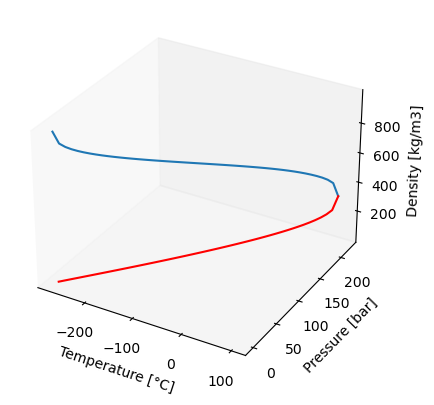

In [15]:
import matplotlib.pyplot as plt
pp = np.linspace(0.00611657, 220.64, 50)
tt = np.linspace(0.01, 373.946, 50)
water = iapws95(P = pp)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(tt - 273.15, pp, water.rhosl)
ax.plot3D(tt - 273.15, pp, water.rhosv, color='red')
ax.set_xlabel('Temperature [°C]')
ax.set_ylabel('Pressure [bar]')
ax.set_zlabel('Density [kg/m3]')
ax.tick_params(direction = 'in', which='both', top=True, right=True)
ax.grid(False)
ax.get_tightbbox(fig.canvas.get_renderer(), call_axes_locator = True,  bbox_extra_artists = None)

Here, the users can specify either a temperature or pressure value and the implementation of this type can solve for corresponding pressure (`T`) or temperature (`P`) respectively and their respective vapor and liquid densities. These functions have been implemented in `iapws95` to calculate thermodynamic properties when saturation curve properties are requested. An example of utilizing `iapws95` for calculating properties at temperatures ranging from 0.01°C to 300°C and saturation pressures is as follows:

In [16]:
TC = np.linspace(0.01, 200, 5)
water = iapws95(T = TC, P = 'T')
water.rho, water.G, water.H, water.S, water.V, water.P, water.TC

(array([999.84376462, 988.031656  , 958.34546327, 917.00540392,
        864.65810229]),
 array([-56279.53650436, -57114.34721375, -58089.12256378, -59184.20258644,
        -60385.54751607]),
 array([-68766.32498231, -67864.92957317, -66961.8516668 , -66044.71299022,
        -65097.09778613]),
 array([15.13740717, 18.1680458 , 20.76615218, 23.06783539, 25.1720857 ]),
 array([0.00430643, 0.00435791, 0.00449291, 0.00469545, 0.00497972]),
 array([ 1.0133    ,  1.0133    ,  1.01436095,  4.76196448, 15.549279  ]),
 array([1.000000e-02, 5.000750e+01, 1.000050e+02, 1.500025e+02,
        2.000000e+02]))

Meanwhile, for calculating water properties with specified pressure at saturation temperature, a typical usage is as follows:

In [17]:
water = iapws95(P = 200, T = 'P')
water.rho, water.G, water.H, water.S, water.V, water.P, water.TC

(array([490.18783526]),
 array([-64995.46289957]),
 array([-60899.23505785]),
 array([32.4275702]),
 array([0.00878389]),
 array([200]),
 array([365.74925556]))

### ZhangDuan Formulation   <a class="anchor" id="section_3_2"></a>
Zhang and Duan (2005) proposed an empirical pressure-volume-temperature equation of state for water at high temperature and pressure, which Sverjensky et al. (2014) developed into Deep Earth Water model. Its implementation in pygcc takes the first two forms described above, which are estimating *Properties as a Function of Temperature and Pressure* and *Properties as a Function of Temperature and Density*. However, in both cases, the outputs are density [kg/m$^{3}$]/pressure [bar], Gibbs energy [cal/mol], derivative of density to pressure at constant temperature and derivative of density to temperature at constant pressure. The typical usage of the [`ZhangDuan()`](https://pygcc.readthedocs.io/en/latest/autoapi/pygcc/water_eos/index.html#pygcc.water_eos.ZhangDuan) function is as below:

In [18]:
water = ZhangDuan(T = 250, P = 1000)
water.rho, water.G, water.drhodP_T, water.drhodT_P

(array([875.09805237]),
 array([-61207.50810984]),
 array([9.3131885e-05]),
 array([-0.00102445]))

### Dielectric Constants Calculation  <a class="anchor" id="section_3_3"></a>
The dielectric constant is one of the most critical properties of water required in calculating Born functions, Debye-Hückel parameters and molal properties of species and reactions at varying temperature and pressure conditions. Like earlier noted, two different formulations were implemented for non-extreme temperature and pressure conditions, and users have a choice to pick the preferred formulation using `Dielec_method` and as further described below. The function [`water_dielec()`](https://pygcc.readthedocs.io/en/latest/autoapi/pygcc/water_eos/index.html#pygcc.water_eos.water_dielec) takes any two combinations of temperature [°C], pressure [bar] and density [kg/m$^{3}$] as inputs, and returns various properties of water such as dielectric constant of water [cal/mol], density [g/cm$^{3}$], Debye-Huckel "A" parameters [kg$^{1/2}$ mol$^{-1/2}$], Debye-Huckel "B" parameters [kg$^{1/2}$ mol$^{-1/2}$ Angstrom$^{-1}$], bdot, Debye-Huckel "A" parameters derivatives associated with apparent molar enthalpy and apparent molar volume, and Debye-Huckel "B" parameters derivatives associated with apparent molar enthalpy and apparent molar volume. 

#### FGL Electrostatic Formulation   <a class="anchor" id="section_3_3_1"></a>
The IAPWS-sanctioned model for the dielectric constant of water is described in IAPWS (1997) and the relevant equations and constants for the model are given in the source document and the paper by Fernández et al. (1997). An example of utilizing `FGL97` for calculating properties at 50°C and 1.0133 bar (at saturation curve) is as follows:

In [19]:
dielect = water_dielec(T = 50, P = 'T', Dielec_method = 'FGL97')
dielect.E, dielect.rhohat, dielect.Ah, dielect.Bh, dielect.bdot, dielect.Adhh, dielect.Adhv, dielect.Bdhh, dielect.Bdhv

(array([69.91599636]),
 array([0.98803505]),
 array([0.53410832]),
 array([0.3325671]),
 array([0.04088528]),
 array([0.68757801]),
 array([2.37680041]),
 array([16.55676064]),
 array([-13.40777756]))

#### JN91 Electrostatic Formulation   <a class="anchor" id="section_3_3_2"></a>
The dielectric constant equation as expressed by Johnson and Norton (1991) and utilized in SUPCRT92 is implemented here. An example of utilizing `JN91` for calculating properties at 50°C and 1.0133 bar (at saturation curve) is as follows:

In [20]:
dielect = water_dielec(T = 50, P = 'T', Dielec_method = 'JN91')
dielect.E, dielect.rhohat, dielect.Ah, dielect.Bh, dielect.bdot, dielect.Adhh, dielect.Adhv, dielect.Bdhh, dielect.Bdhv

(array([69.80673495]),
 array([0.98803505]),
 array([0.53537265]),
 array([0.33283636]),
 array([0.04088528]),
 array([0.68352145]),
 array([2.53510753]),
 array([16.39347606]),
 array([-18.16464841]))

#### DEW Electrostatic Formulation   <a class="anchor" id="section_3_3_3"></a>
Sverjensky et al (2014) extended the application of the revised HKF model to deep Earth (upper mantle) conditions by developing an empirical correlation for dielectric constant of water up to 60 kbar and 1200 °C using experimental data and molecular dynamics simulation data. This implementation is considered with `ZhangDuan` water EoS to model high temperature and pressure conditions, taking inputs and printing output similar to the above description. An example of the utilization of `DEW` to calculate properties at 200 °C and 1000 bar is as follows:

In [21]:
dielect = water_dielec(T = 200, P = 1000, Dielec_method = 'DEW')
dielect.E, dielect.rhohat, dielect.Ah, dielect.Bh, dielect.bdot, dielect.Adhh, dielect.Adhv, dielect.Bdhh, dielect.Bdhv

(array([38.32009939]),
 array([0.92183148]),
 array([0.71764521]),
 array([0.35859842]),
 array([0.04452579]),
 array([0.2115715]),
 array([7.02321141]),
 array([52.29367986]),
 array([-66.08043662]))

## Calculating thermodynamic properties     <a class="anchor" id="section_4"></a>
The molal properties of species and reactions at any temperature and pressure condition are computed using the different classification described below.

### Thermodynamic Properties of Reactions among species      <a class="anchor" id="section_4_1"></a>
The calculation of equilibrium constants for reactions among aqueous, gas, and mineral species is implemented in the pygcc `calcRxnlogK(T = None, P = None, Specie = None, dbaccessdic = None, sourcedic = None, specielist = None, heatcap_method = None, sourceformat = None, densityextrap = False)` function. The logarithm (base 10) of the equilibrium constant ($ K_{eq} $) of any reaction is calculated via: 

$$log K_{eq} = \frac{G^{reactants}_{T, P} - G^{products}_{(T, P)}}{-RTln(10)}  $$

The function outputs logarithm of the equilibrium constant, Gibbs free energy of the reaction, total Gibbs free energy of the product species and total Gibbs free energy of the reactant species. The required inputs are temperature [°C], pressure [bar], Specie (a *string* that specifies the name of the product species), direct-access database dictionary (for example above, *Db_thermo.dbaccessdic*), source database dictionary and species list (for example above, *Db_thermo.sourcedic, Db_thermo.specielist*), `densityextrap` (bool - True or False - to indicate usage of density extrapolation), `sourceformat` (either *GWB* or *EQ36*) and `heatcap_method` (specifying either `'SUPCRT'` or `'HF76'` or `'HP11'` or `'Berman88'` for using either `Maier-Kelley powerlaw`, `Haas-Fisher powerlaw`, `Holland and Powell` and `Berman`'s formulation function respectively) and other optional inputs like `Dielec_method`, `ThermoInUnit`, `Al_Si`, `Specie_class`, `ClayMintype`, `elem`, `group`, `cpx_Ca`, `X` and `rhoEGextrap`. Check the [documentation](https://pygcc.readthedocs.io/en/latest/autoapi/pygcc/pygcc_utils/index.html#pygcc.pygcc_utils.calcRxnlogK) for more information.

#### Redox and Aqueous species     <a class="anchor" id="section_4_1_1"></a>
The standard molal Gibbs energy of aqueous, redox or auxilliary aqueous species  with temperature and pressure can be calculated using the [`supcrtaq`](https://pygcc.readthedocs.io/en/latest/autoapi/pygcc/species_eos/index.html#pygcc.species_eos.supcrtaq) function. The name and the different equations implemented in this function is derived from the SUPCRT package (Johnson et al., 1992). An example of utilizing [`supcrtaq`](https://pygcc.readthedocs.io/en/latest/autoapi/pygcc/species_eos/index.html#pygcc.species_eos.supcrtaq) for calculating Gibbs free energy of *'NaCl(aq)'* at 60°C and 100 bar with different `Dielec_method` and higher pressure `DEW` is as follows:

In [22]:
supcrtaq(60, 100, Db_thermo.dbaccessdic['NaCl(aq)'], Dielec_method = 'JN91')

array([-93847.85528561])

In [23]:
supcrtaq(60, 100, Db_thermo.dbaccessdic['NaCl(aq)'], Dielec_method = 'FGL97')

array([-93847.82866489])

In [24]:
supcrtaq(100, 1000, Db_thermo.dbaccessdic['NaCl(aq)'], Dielec_method = 'DEW')

array([-94480.46872573])

#### Mineral and gas species     <a class="anchor" id="section_4_1_2"></a>
The standard molal Gibbs free energy and heat capacity with temperature and pressure of mineral and gas species can be calculated in pygcc using the [`heatcap`](https://pygcc.readthedocs.io/en/latest/autoapi/pygcc/species_eos/index.html#pygcc.species_eos.heatcap) function based on Maier-Kelly powerlaw (Maier and Kelley, 1932), Haas-Fisher powerlaw  (Haas and Fisher 1976), and formulation by Holland and Powell (1998) and Berman (1988). The 5-term Haas-Fisher polynomial equation (Haas and Fisher 1976) was implemented to calculate Gibbs free energy and heat capacity for some minerals as reported by Robie and Hemingway (1995), as implemented by setting the `method` to `HF78`. In addition, Berman (1988) reported an internally consistent standard state thermodynamic data set for 67 minerals using a different thermodynamic conventions as compared with that used by Helgeson et al. (1978). The equation of state by Berman (1988) was converted to the Helgeson Convention used in pygcc by considering the equation below as implemented in [`heatcap`](https://pygcc.readthedocs.io/en/latest/autoapi/pygcc/species_eos/index.html#pygcc.species_eos.heatcap) function by setting the `method` to `berman88`. 

$$ G_{Helgeson} = G_{Berman} + T_{r} S^{elements}_{(Tr, Pr)} $$

Because it has been established that expansibilities and compressibilities can have considerable influence on computed Gibbs free energies of minerals, Holland and Powell (1998) recently proposed an equation of state that handles mineral volumes as temperature and pressure dependent. This function can be utilized by setting the `method` to `HP11` as implemented in the [`heatcap`](https://pygcc.readthedocs.io/en/latest/autoapi/pygcc/species_eos/index.html#pygcc.species_eos.heatcap) function. Examples of utilizing `heatcap` for calculating Gibbs free energy and heat capacity of *'CO$_{2}$(g)'*, *'Fluorapatite'*, and *'Quartz'* respectively at 60°C and 100 bar with the default `JN91 Dielec_method` are as follows:

In [25]:
sp = heatcap(T = 60, P = 100, Species = 'CO2(g)', Species_ppt = Db_thermo.dbaccessdic['CO2(g)'], method = 'SUPCRT')
sp.dG, sp.dCp

(array([-96059.91196724]), array([9.41357392]))

In [26]:
sp = heatcap(T = 60, P = 100, Species = 'Fluorapatite', Species_ppt = Db_thermo.dbaccessdic['Fluorapatite'], method = 'HF76')
sp.dG, sp.dCp

(array([-1554128.63647955]), array([94.71751487]))

In [27]:
ps = db_reader(dbBerman_dir = './database/berman.dat')
sp = heatcap( T = 60, P = 100, Species = 'Quartz', Species_ppt = ps.dbaccessdic['Quartz'], method = 'berman88')
sp.dG, sp.dCp

Duplicate found for species "Cordierite" in berman.dat


(array([-204972.30130472]), array([11.51694157]))

In [28]:
db = db_reader(dbHP_dir = './database/supcrtbl.dat')
sp = heatcap( T = 60, P = 100, Species = 'Quartz', Species_ppt = db.dbaccessdic['Quartz'], method = 'HP11')
sp.dG, sp.dCp

Duplicate found for species "Fluorphlogopite" in supcrtbl.dat
Duplicate found for species "Arsenic" in supcrtbl.dat
Duplicate found for species "Arsenolite" in supcrtbl.dat


(array([-204968.01944417]), array([11.53479289]))

### Solid-solution species     <a class="anchor" id="section_4_2"></a>
The standard molal properties of solid-solution species and reactions are computed differently from other minerals, interaction parameters and mixing rules as described in Stefánsson (2001) are applied in combining the properties of various end-members thermodynamic data from Robie and Hemingway (1995). The function [`solidsolution_thermo`](https://pygcc.readthedocs.io/en/latest/autoapi/pygcc/solid_solution/index.html#pygcc.solid_solution.solidsolution_thermo) or [`calcRxnlogK`](#section_4_1) computes reaction species and coefficient, and molal properties of solid-solutions of plagioclase, olivine, pyroxene, alkali-feldspar and clinopyroxene minerals. The inputs are mole fractions of Anorthite, Forsterite, Enstatite or Albite as the case may be and number of moles of Calcium in the clinopyroxene formula units and the $\frac{Mg}{Mg+Fe}$ ratio for clinopyroxene, coupled with temperature [°C], pressure [bar], `solidsolution_type` (specifying either 'All' or 'plagioclase' or 'olivine' or 'pyroxene' or 'cpx' or 'alk-feldspar') and a direct-access dictionary (for example above, [Db_thermo.dbaccessdic]). If the moles of calcium is zero, the solid-solution is reduced to pyroxene end-member, which is is a binary solid solution between orthoenstatite and ferrosilite. Hence, setting the `solidsolution_type` to `'cpx'` should only be used if moles of calcium is greater than zero. The structure of the output includes an *array* of equilibrium constants and a *dictionary* containing mineral type, name, formula, molecular weight, list of properties (like Db_thermo.dbaccessdic), reaction species and coefficient, mineral volume, data source and elements species and moles. An example that calculates solid-solution properties for *'Di45Hed25En19Fe11'* at 60°C and 100 bar with the default `JN91` formulation is:

In [29]:
ss = solidsolution_thermo(T = 60, P = 100, solidsolution_type = 'cpx', X = 0.7, cpx_Ca = 0.646,
                          dbaccessdic = Db_thermo.dbaccessdic)
ss.logK, ss.Rxn

(array([17.81356522]),
 {'type': 'cpx',
  'name': 'Di45Hed19En25Fe11',
  'formula': 'Ca0.65Mg0.95Fe0.41Si2O6',
  'MW': 224.20512,
  'min': ['Ca0.65Mg0.95Fe0.41Si2O6',
   ' R&H95, Stef2001',
   -681678.7564868213,
   nan,
   39.535095090743326,
   65.566176,
   95.86780066921605,
   -0.01085667447418738,
   -89154.23518164441,
   -887.9544455066921,
   3.040245219885277e-06],
  'spec': ['H+', 'Ca++', 'Mg++', 'Fe++', 'SiO2(aq)', 'H2O'],
  'coeff': [-4, 0.65, 0.95, 0.41, 2, 2],
  'nSpec': 6,
  'V': 65.566176,
  'source': ' R&H95, Stef2001',
  'elements': ['0.6500',
   'Ca',
   '0.9500',
   'Mg',
   '0.4100',
   'Fe',
   '2.0000',
   'Si',
   '6.0000',
   'O']})

A similar result can be generated using [`calcRxnlogK`] as below and the difference is that `calcRxnlogK` allows computation of equilibrium constants using density extrapolation as [below](#section_4_4) .

In [30]:
ss = calcRxnlogK(T = 60, P = 100, Specie = 'cpx', X = 0.7, cpx_Ca = 0.646, dbaccessdic = Db_thermo.dbaccessdic)
ss.logK, ss.Rxn

(array([17.81356522]),
 {'type': 'cpx',
  'name': 'Di45Hed19En25Fe11',
  'formula': 'Ca0.65Mg0.95Fe0.41Si2O6',
  'MW': 224.20512,
  'min': ['Ca0.65Mg0.95Fe0.41Si2O6',
   ' R&H95, Stef2001',
   -681678.7564868213,
   nan,
   39.535095090743326,
   65.566176,
   95.86780066921605,
   -0.01085667447418738,
   -89154.23518164441,
   -887.9544455066921,
   3.040245219885277e-06],
  'spec': ['H+', 'Ca++', 'Mg++', 'Fe++', 'SiO2(aq)', 'H2O'],
  'coeff': [-4, 0.65, 0.95, 0.41, 2, 2],
  'nSpec': 6,
  'V': 65.566176,
  'source': ' R&H95, Stef2001',
  'elements': ['0.6500',
   'Ca',
   '0.9500',
   'Mg',
   '0.4100',
   'Fe',
   '2.0000',
   'Si',
   '6.0000',
   'O']})

### Clay Mineral species     <a class="anchor" id="section_4_3"></a>
The thermodynamic properties for any clay minerals, including 42 of which are compiled in **clay_elements.dat**, can be calculated based on techniques detailed by Blanc et al (2015, 2021). These techniques have been implemented in function `calclogKclays`, which takes inputs as temperature [°C], pressure [bar], a *list* containing clay mineral name and elemental composition in this particular order ['clay_name', 'Si', 'Al', 'FeIII', 'FeII', 'Mg', 'K', 'Na', 'Ca', 'Li'], a *dictionary* containing the thermodynamic properties of each species (for example above, [Db_thermo.dbaccessdic]) and a *string* that specifies the structural layering of the phyllosilicate. Examples of utilizing `calclogKclays` and `calcRxnlogK` for calculating properties of *'Chamosite'* at 60°C and 100 bar with the default `Dielec_method` are:


In [31]:
calclogKclays(60, 100, *['Chamosite','3','2','0','5','0','0','0','0','0'], 
              dbaccessdic = Db_thermo.dbaccessdic,  group='14A')

(array([40.01276655]),
 {'type': 'Smectites',
  'name': 'Chamosite',
  'formula': 'Fe5.00Al2.00Si3.0O10(OH)8',
  'MW': 713.5073000000001,
  'min': ['Fe5.00Al2.00Si3.0O10(OH)8',
   'B2015, B2021',
   -1553442.9682398445,
   -1699939.053537285,
   134.53834562298331,
   215.92,
   146.64913957934988,
   86.36591778202677,
   -30.076481835564053],
  'spec': ['H+', 'Fe++', 'Al+++', 'SiO2(aq)', 'H2O'],
  'coeff': [-16.0, 5.0, 2.0, 3.0, 12.0],
  'nSpec': 5,
  'V': 215.92,
  'dG': -6499.60537911551,
  'dHf': -7112.545000000001,
  'Cp': 579.765,
  'source': 'B2015, B2021',
  'elements': ['5.0000',
   'Fe',
   '2.0000',
   'Al',
   '3.0000',
   'Si',
   '8.0000',
   'H',
   '18.0000',
   'O']})

In [32]:
clay = calcRxnlogK(T = 60, P = 100, elem = ['Chamosite','3','2','0','5','0','0','0','0','0'], 
              Specie = 'clay',  dbaccessdic = Db_thermo.dbaccessdic)
clay.logK, clay.Rxn

(array([40.01276655]),
 {'type': 'Smectite',
  'name': 'Chamosite',
  'formula': 'Fe5.00Al2.00Si3.0O10(OH)8',
  'MW': 713.5073000000001,
  'min': ['Fe5.00Al2.00Si3.0O10(OH)8',
   'B2015, B2021',
   -1553442.9682398445,
   -1699939.053537285,
   134.53834562298331,
   215.92,
   146.64913957934988,
   86.36591778202677,
   -30.076481835564053],
  'spec': ['H+', 'Fe++', 'Al+++', 'SiO2(aq)', 'H2O'],
  'coeff': [-16.0, 5.0, 2.0, 3.0, 12.0],
  'nSpec': 5,
  'V': 215.92,
  'dG': -6499.60537911551,
  'dHf': -7112.545000000001,
  'Cp': 579.765,
  'source': 'B2015, B2021',
  'elements': ['5.0000',
   'Fe',
   '2.0000',
   'Al',
   '3.0000',
   'Si',
   '8.0000',
   'H',
   '18.0000',
   'O']})

### Density extrapolation     <a class="anchor" id="section_4_4"></a>
The calculation of the standard molal Gibbs free energy of charged species as described by the revised Helgeson-Kirkham-Flowers (HKF) equation of state is limited to temperature-pressure condition for which the water density > 0.35 g/$cm^{3}$, temperature < 350°C, pressure < 500 bar and not valid within the critical water region (350 – 400 °C). Hence, outside this region, the approach that is considered here is to linearly extrapolate thermodynamic properties with 0.35 g/$cm^{3}$ < density < 0.6 g/$cm^{3}$ to calculate corresponding equilibrium constants for region with density < 0.35 g/$cm^{3}$  as show below. However, regions where density > 0.35 g/$cm^{3}$ and critical water region (350 – 400 °C) are still not valid within this density extrapolation range. 

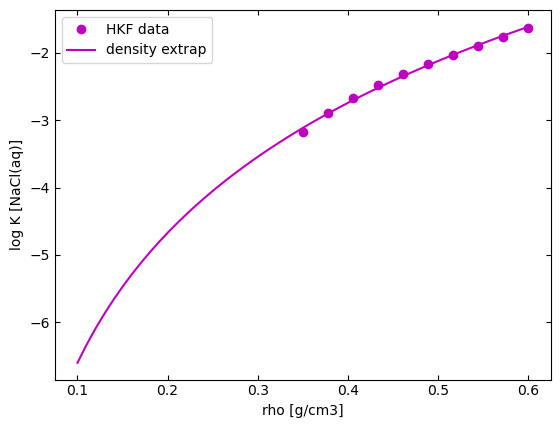

In [33]:
from density_extrap import plot_densityextrap
plot_densityextrap()

This approach is implemented in `calcRxnlogK` and can be activated by setting `densityextrap` to `True`. Examples are shown below

In [34]:
rxncalc = calcRxnlogK(T = 450, P = 300, Specie = 'H2S(aq)',  sourcedic = Db_thermo.sourcedic, 
                      dbaccessdic = Db_thermo.dbaccessdic, specielist = Db_thermo.specielist, 
                      densityextrap = True)
rxncalc.logK

array([-14.26282955])

In [35]:
ss = calcRxnlogK(T = 450, P = 300, Specie = 'plagioclase', X = 0.7, densityextrap = True,
                 dbaccessdic = Db_thermo.dbaccessdic)
ss.logK

array([9.97884849])

In [36]:
clay = calcRxnlogK(T = 450, P = 300, elem = ['Chamosite','3','2','0','5','0','0','0','0','0'], 
                   Specie = 'clay',  dbaccessdic = Db_thermo.dbaccessdic, group = '14A', 
                   densityextrap = True)
clay.logK

array([36.02176691])

## Generating thermodynamic database      <a class="anchor" id="section_5"></a>
Generating database for any of `GWB`, `EQ3/6`, `ToughReact`, `Pflotran` or Phreeqc (under development) can be easily achieved through the function `write_database`. This function requires several inputs some of which are compulsory - temperature [°C], pressure [bar] and dataset format (`GWB`, `EQ36`, `ToughReact`, or `Pflotran`). _Note: GWB requires exactly 8 temperature and pressure pairs_. If the users want default solid_solution and clay_minerals included, then the inputs have to include *'Yes'* or *True* option. By default, density extrapolation is included to generate equilibrium constants for regions outside the revised HKF applicability, however, if the users want to turn off density extrapolation, this can be achieved by setting `densityextrap = 'No'`. Meanwhile, for `ToughReact` and `Pflotran`, their source database can be either of `GWB` or `EQ3/6` and this option needs to included as part of the inputs through *'sourceformat'*, see example below.

A typical example of the command to generate **GWB** using 0°C to 350°C temperature range, 300 bar and nCa of 0.5 and turning on the inclusion of solid_solution and clay minerals thermodynamics is as follows:


In [37]:
write_database(T = [0, 350], P = 300, nCa_cpx = 0.5, solid_solution = 'Yes',  clay_thermo = 'Yes', dataset = 'GWB')

Success, your new GWB database is ready for download


You can scroll to the folder **"output"** to access the newly generated database as well as a text file *"spxNotFound"* containing species that are not found in direct-access database.

Another typical example (converting **EQ3/6** to **GWB**) of the command to generate **GWB** using **EQ3/6** source database, 0°C to 250°C temperature range, 100 bar and turning on the inclusion of solid_solution and clay minerals thermodynamics is as follows:

In [38]:
write_database(T = [0, 250], P = 100, solid_solution = True, clay_thermo = True, 
               dataset = 'GWB', sourcedb = './database/data0.geo', sourceformat = 'EQ36')

Success, your new GWB database is ready for download


A typical example of the command to generate **EQ3/6** using specified temperature range, 250 bar and nCa of 0.5 and turning on the inclusion of solid_solution thermodynamics only is as follows:

In [39]:
T = np.array([ 0.010, 25.0000 , 60.0000, 100.0000, 150.0000, 200.0000, 250.0000, 300.0000])
P = 250*np.ones(np.size(T))
write_database(T = T, P = P, nCa_cpx = 0.5, solid_solution = 'Yes', dataset = 'EQ36')

Success, your new EQ3/6 database is ready for download


A typical example of the command to generate **ToughReact** using 0°C to 300°C temperature range, 250 bar, and turning on the inclusion of clay minerals thermodynamics only, also specifying the location of the source database is as follows:

In [40]:
write_database(T = [0, 300], P = 250, clay_thermo = 'Yes', sourcedb = './database/thermo.com.tdat', 
               dataset = 'ToughReact', sourceformat = 'GWB')

Success, your new ToughReact database is ready for download


A typical example of the command to generate **Pflotran** using 0°C to 300°C temperature range, 250 bar, and turning on the inclusion of clay minerals thermodynamics only, here we can specify EQ36 sourceformat is as follows:

In [41]:
write_database(T = [0, 300], P = 250, clay_thermo = 'Yes', dataset = 'Pflotran', 
               sourceformat = 'EQ36')

Success, your new Pflotran database is ready for download


## Citation and contact information     <a class="anchor" id="section_6"></a>

If you use pyGeochemCalc (pygcc) for publications, consider citing the following paper:

> Awolayo, A. N. and Tutolo, B. M. (2022). "PyGeochemCalc: A python package for geochemical thermodynamic calculations and software-specific thermodynamic database production from ambient to deep Earth conditions". Chemical Geology, 606 (120984). [doi:10.1016/j.chemgeo.2022.120984](https://www.sciencedirect.com/science/article/pii/S0009254122002789)


If you found a bug or have questions that are not answered in this documentation, please contact:

"`Adedapo Awolayo` <adedapo.awolayo@ucalgary.ca>"

"`Benjamin Tutolo` <benjamin.tutolo@ucalgary.ca>"

## References:    <a class="anchor" id="section_7"></a>

* Wagner W, Pruß A. (2002). The IAPWS formulation 1995 for the thermodynamic properties of ordinary water substance for general and scientific use. Journal of Physical and Chemical Reference Data 31(2): 387–535. doi: 10.1063/1.1461829

* Johnson J. W., Oelkers E. H., and Helgeson H. C. (1992). SUPCRT92: A software package for calculating the standard molal thermodynamic properties of minerals, gases, aqueous species, and reactions from 1 to 5000 bar and 0 to 1000°C. Computers and Geosciences 18(7): 899–947. doi: 10.1016/0098-3004(92)90029-Q

* Wolery, T.J., (2020). H2OI95: A Stand-Alone Fortran Code for Evaluating the IAPWS-95 Equation-of-State Model for Water (Rev. 1) (No. LLNL-TR-805304). Lawrence Livermore National Lab.(LLNL), Livermore, CA (United States).

* Helgeson H.C. and Kirkham D.H., (1974), American Journal of Science, Vol.274, pp:1199-1261

* International Association for the Properties of Water and Steam, IAPWS R8-97 (1997), Release on the Static Dielectric Constant of Ordinary Water Substance for Temperatures from 238 K to 873 K and Pressures up to 1000 MPa (1997), 9 pp 

* Fernandez D. P., Goodwin A. R. H., Lemmon E. W., Levelt Sengers J. M. H., and Williams R. C. (1997) A Formulation for the Permittivity of Water and Steam at Temperatures from 238 K to 873 K at Pressures up to 1200 MPa, including Derivatives and Debye-Hückel Coefficients. J. Phys. Chem. Ref. Data 26, 1125-1166

* Robie R. A. and Hemingway B. S. (1995). Thermodynamic Properties of Minerals and Related Substances at 298.15 K and 1 Bar (105 Pascals) Pressure and at Higher Temperatures. Washington, D. C.: U. S. Geological Survey. (Bulletin 2131). doi: 10.3133/b2131

* Stefánsson, A. (2001). Dissolution of primary minerals of basalt in natural waters: I. Calculation of mineral solubilities from 0 C to 350 C. Chemical Geology, 172(3-4), 225-250.

* Blanc, P., Vieillard, P., Gailhanou, H., Gaboreau, S., Gaucher, É., Fialips, C. I., Madé, B. and Giffaut, E. (2015). A generalized model for predicting the thermodynamic properties of clay minerals. American journal of science, 315(8), 734-780.

* Blanc, P., Gherardi, F., Vieillard, P., Marty, N. C. M., Gailhanou, H., Gaboreau, S., Letat, B., Geloni, C., Gaucher, E.C. and Madé, B. (2021). Thermodynamics for clay minerals: calculation tools and application to the case of illite/smectite interstratified minerals. Applied Geochemistry, 104986.

* Kong, X. Z., Tutolo, B. M., Saar, M. O. (2013) DBCreate: A SUPCRT92-Based Program for Producing EQ3/6, TOUGHREACT, and GWB Thermodynamic Databases at User-Defined T and P. Comput. Geosci., 51, 415–417.

* Johnson, J. W., and Norton, D. (1991) Critical phenomena in hydrothermal systems: state, thermodynamic, electrostatic, and transport properties of H20 in the critical region: Am. Jour. Science, v. 291, no. 6, p. 541-648

* Haar, L., Gallagher, J. S., and Kell, G. S. (1984). NBS/NRC steam tables thermodynamic and transport properties and computer programs for vapor and liquid states of water in SI units. Hemisphere, Washington, D.C., 320 p

* Sverjensky, D.A., Harrison, B., Azzolini, D., 2014. Water in the deep Earth: The dielectric constant and the solubilities of quartz and corundum to 60kb and 1200°C. Geochim. Cosmochim. Acta 129, 125–145. https://doi.org/10.1016/j.gca.2013.12.019

* Zhang, C. and Duan, Z., 2009. “A model for C-O-H fluid in the Earth’s mantle”, Geochimica et Cosmochimica Acta, vol. 73, no. 7, pp. 2089–2102, doi:10.1016/j.gca.2009.01.021.

* Zhang, Z., Duan, Z., 2005. Prediction of the PVT properties of water over wide range of temperatures and pressures from molecular dynamics simulation. Phys. Earth Planet. Inter. 149, 335–354. https://doi.org/10.1016/j.pepi.2004.11.003.

* Johnson, J.W., Norton, D., 1991. Critical phenomena in hydrothermal systems: state, thermodynamic, electrostatic, and transport properties of H2O in the critical region. Am. J. Sci. 291, 541–648. https://doi.org/10.2475/ajs.291.6.541

* Maier, C.G., Kelley, K.K., 1932. An equation for the representation of high-temperature heat content data. J. Am. Chem. Soc. https://doi.org/10.1021/ja01347a029

* Haas, J.L., Fisher, J.R., 1976. Simultaneous evaluation and correlation of thermodynamic data. Am. J. Sci. https://doi.org/10.2475/ajs.276.4.525

* Helgeson, H.C., Delany, J.M., Nesbitt, H.W., Bird, D.K., 1978. Summary and critique of the thermodynamic properties of the rock-forming minerals. Am. J. Sci. 278A, 229

* Holland, T. and Powell, R., 2011. An improved and extended internally consistent thermodynamic dataset for phases of petrological interest, involving a new equation of state for solids. Journal of Metamorphic Geology. 29, 333–383.

* Holland, T.J.B. and Powell, R., 1998. An internally-consistent thermodynamic dataset for phases of petrological interest. Journal of Metamorphic Geology, 16, 309–344.

* Zimmer, K., Zhang, Y.L., Lu, P., Chen, Y.Y., Zhang, G.R., Dalkilic, M. and Zhu, C. (2016) SUPCRTBL: A revised and extended thermodynamic dataset and software package of SUPCRT92. Computer and Geosciences 90:97-111

Thank you and have fun utilizing pyGeochemCalc